# Introduction to Data Analysis for Aspiring Data Scientists
## Data Analysis with `pandas`

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
 - Motivate why to use `pandas`
 - Introduce `pandas` and its history
 - Import the COVID-19 dataset
   * `pd.read_csv()`
 - Summarize the data
   * `head`, `tail`, `shape`
   * `sum`, `min`, `count`, `mean`, `std`
   * `describe`
 - Slice and munge data
   * Slicing, `loc`, `iloc`
   * `value_counts`
   * `drop`
   * `sort_values`
   * Filtering
 - Group data and perform aggregate functions
   * `groupby`
 - Work with missing data and duplicates
   * `isnull`
   * `unique`, `drop_duplicates`
   * `fillna`
 - Visualization
   * Histograms
   * Scatterplots
   * Lineplots
 
 Check out [this cheetsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for help.  Also see [the `pandas` docs.](https://pandas.pydata.org/docs/)

### Motivate why to use `pandas`

Let's start big picture...<br><br>

* Humans are tool using animals animals
* Computers are one of the most powerful tools we've created
* If you write code, you can unlock the full power of these tools

Ok, cool. But why `pandas`?<br><br>

* More and more, data is leading decision making
* Excel is great but what if...
  - You want to automate your analysis so it re-runs on new data each day?
  - You want to build a code base to share with your colleaguges
  - You want more robust analyses to feed a business decision
  - You want to do machine learning
* One of the core libraries used by data analysts and data scientists in Python

Enter `pandas`...

### Introduce `pandas` and its history

`pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

Highlights:

- Built in 2008, open sourced in 2009
- A fast and efficient **DataFrame object** for data manipulation with integrated indexing;
- Tools for **reading and writing data** between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent **data alignment** and integrated handling of **missing data**: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible **reshaping and pivoting** of data sets;
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets;
- Columns can be inserted and deleted from data structures for **size mutability**;
- Aggregating or transforming data with a powerful **group by** engine allowing split-apply-combine operations on data sets;
- High performance **merging and joining** of data sets;
- Hierarchical axis **indexing** provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- **Time series**-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly **optimized** for performance, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of **academic and commercial domains**, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.


[Check out the book](https://www.amazon.com/gp/product/1491957662/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=quantpytho-20&creative=9325&linkCode=as2&creativeASIN=1491957662&linkId=ea8de4253cce96046e8ab0383ac71b33)

### Import the COVID-19 dataset

Use `%sh ls` to search the folder structure

In [0]:
%sh ls /dbfs/databricks-datasets/COVID/

ls: cannot access '/dbfs/databricks-datasets/COVID/': No such file or directory

In [0]:
%sh ls /dbfs/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports

ls: cannot access '/dbfs/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports': No such file or directory

Use `%sh head` to see the first few lines of CSV file

In [0]:
%sh head /dbfs/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2020.csv

head: cannot open '/dbfs/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2020.csv' for reading: No such file or directory

Import `pandas`.  Alias it as `pd`

In [0]:
import pandas as pd

Read the csv file.  This creates a `DataFrame`

In [0]:
dbutils.fs.cp("dbfs:/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports/04-11-2020.csv", "file:////tmp/covid.csv")
pd.read_csv("file:////tmp/covid.csv")

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-11 22:45:33,34.223334,-82.461707,9,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-11 22:45:33,30.295065,-92.414197,98,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-11 22:45:33,37.767072,-75.632346,15,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-11 22:45:33,43.452658,-116.241552,513,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-11 22:45:33,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2961,NaN,NaN,NaN,Western Sahara,2020-04-11 22:45:13,24.215500,-12.885800,4,0,0,4,",,Western Sahara"
2962,NaN,NaN,NaN,Yemen,2020-04-11 22:45:13,15.552727,48.516388,1,0,0,1,Yemen
2963,NaN,NaN,NaN,Zambia,2020-04-11 22:45:13,-13.133897,27.849332,40,2,28,10,Zambia
2964,NaN,NaN,NaN,Zimbabwe,2020-04-11 22:45:13,-19.015438,29.154857,14,3,0,11,Zimbabwe


Now let's combine the lines of code and save the `DataFrame` to a variable so we can reuse it

In [0]:
import pandas as pd

df = pd.read_csv("file:////tmp/covid.csv")

df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-11 22:45:33,34.223334,-82.461707,9,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-11 22:45:33,30.295065,-92.414197,98,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-11 22:45:33,37.767072,-75.632346,15,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-11 22:45:33,43.452658,-116.241552,513,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-11 22:45:33,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2961,NaN,NaN,NaN,Western Sahara,2020-04-11 22:45:13,24.215500,-12.885800,4,0,0,4,",,Western Sahara"
2962,NaN,NaN,NaN,Yemen,2020-04-11 22:45:13,15.552727,48.516388,1,0,0,1,Yemen
2963,NaN,NaN,NaN,Zambia,2020-04-11 22:45:13,-13.133897,27.849332,40,2,28,10,Zambia
2964,NaN,NaN,NaN,Zimbabwe,2020-04-11 22:45:13,-19.015438,29.154857,14,3,0,11,Zimbabwe


### Summarize the data

First, let's talk tab completion

In [0]:
# df. # Uncomment this and press 'tab' with your cursor after the "."

Need help?

In [0]:
help(df.head())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 
 Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 
 Data structure also contains labeled axes (rows and columns).
 Arithmetic operations align on both row and column labels. Can be
 thought of as a dict-like container for Series objects. The primary
 pandas data structure.
 
 Parameters
 ----------
 data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 Dict can contain Series, arrays, constants, or list-like objects.
 
 .. versionchanged:: 0.23.0
 If data is a dict, column order follows insertion-order for
 Python 3.6 and later.
 
 .. versionchanged:: 0.25.0
 If data is a list of dicts, column order follows insertion-order
 for Python 3.6 and later.
 
 index : Index or array-like
 Index to use for resulting frame. Will default to RangeIndex if
 no indexing information part of input data and no index provided.
 columns : Index or array-like
 Column labels to use for resulting frame. Will default to
 RangeIndex (0, 1, 2, ..., n) if no column labels are provided.
 dtype : dtype, default None
 Data type to force. Only a single dtype is allowed. If None, infer.
 copy : bool, default False
 Copy data from inputs. Only affects DataFrame / 2d ndarray input.
 
 See Also
 --------
 DataFrame.from_records : Constructor from tuples, also record arrays.
 DataFrame.from_dict : From dicts of Series, arrays, or dicts.
 read_csv
 read_table
 read_clipboard
 
 Examples
 --------
 Constructing DataFrame from a dictionary.
 
 >>> d = {'col1': [1, 2], 'col2': [3, 4]}
 >>> df = pd.DataFrame(data=d)
 >>> df
 col1 col2
 0 1 3
 1 2 4
 
 Notice that the inferred dtype is int64.
 
 >>> df.dtypes
 col1 int64
 col2 int64
 dtype: object
 
 To enforce a single dtype:
 
 >>> df = pd.DataFrame(data=d, dtype=np.int8)
 >>> df.dtypes
 col1 int8
 col2 int8
 dtype: object
 
 Constructing DataFrame from numpy ndarray:
 
 >>> df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
 ... columns=['a', 'b', 'c'])
 >>> df2
 a b c
 0 1 2 3
 1 4 5 6
 2 7 8 9
 
 Method resolution order:
 DataFrame
 pandas.core.generic.NDFrame
 pandas.core.base.PandasObject
 pandas.core.accessor.DirNamesMixin
 pandas.core.base.SelectionMixin
 pandas.core.indexing.IndexingMixin
 builtins.object
 
 Methods defined here:
 
 __add__(self, other, axis=None, level=None, fill_value=None)
 Binary operator __add__ with support to substitute a fill_value for missing data in
 one of the inputs
 
 Parameters
 ----------
 other : Series, DataFrame, or constant
 axis : {0, 1, 'index', 'columns'}
 For Series input, axis to match Series index on
 fill_value : None or float value, default None
 Fill existing missing (NaN) values, and any new element needed for
 successful DataFrame alignment, with this value before computation.
 If data in both corresponding DataFrame locations is missing
 the result will be missing
 level : int or name
 Broadcast across a level, matching Index values on the
 passed MultiIndex level
 
 Returns
 -------
 result : DataFrame
 
 Notes
 -----
 Mismatched indices will be unioned together
 
 __and__(self, other, axis='columns', level=None, fill_value=None)
 Binary operator __and__ with support to substitute a fill_value for missing data in
 one of the inputs
 
 Parameters
 ----------
 other : Series, DataFrame, or constant
 axis : {0, 1, 'index', 'columns'}
 For Series input, axis to match Series index on
 fill_value : None or float value, default None
 Fill existing missing (NaN) values, and any new element needed for
 successful DataFrame alignment, with this value before computation.
 If data in both corresponding DataFrame locations is missing
 the result will be missing
 level : int or name
 Broadcast across a level, mat

Take a peak at the first and last few rows of the data

In [0]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-11 22:45:33,34.223334,-82.461707,9,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-11 22:45:33,30.295065,-92.414197,98,4,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-11 22:45:33,37.767072,-75.632346,15,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-11 22:45:33,43.452658,-116.241552,513,6,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-11 22:45:33,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [0]:
df.tail(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2964,NaN,NaN,NaN,Zimbabwe,2020-04-11 22:45:13,-19.015438,29.154857,14,3,0,11,Zimbabwe
2965,NaN,unassigned,Utah,US,2020-04-11 22:45:33,NaN,NaN,0,5,0,0,"unassigned, Utah, US"


How many records are in the dataset?

In [0]:
df.shape

Out[11]: (2966, 12)

Summarize the data

In [0]:
# df.sum()
# df.min()
# df.max()
# df.count()
df.mean()
# df.std()

Out[12]: FIPS 31172.744602
Lat 36.593211
Long_ -80.631050
Confirmed 597.324343
Deaths 36.581591
Recovered 135.573163
Active 259.664531
dtype: float64

These summary stats are aggregated for you...

In [0]:
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2686.000000,2908.000000,2908.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,31172.744602,36.593211,-80.631050,597.324343,36.581591,135.573163,259.664531
std,17195.765629,10.014396,40.630638,6258.787932,593.397444,2303.045843,3663.293511
min,66.000000,-51.796300,-159.856183,0.000000,0.000000,0.000000,0.000000
25%,18085.500000,33.732077,-95.619070,4.000000,0.000000,0.000000,0.000000
50%,29144.000000,37.831088,-87.333483,13.000000,0.000000,0.000000,0.000000
75%,46066.500000,41.485022,-80.793722,64.000000,2.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,163027.000000,19468.000000,64264.000000,100269.000000


### Slice and munge data

Grab just the confirmed cases

In [0]:
df['Confirmed']

Out[14]: 0 9
1 98
2 15
3 513
4 1
 ... 
2961 4
2962 1
2963 40
2964 14
2965 0
Name: Confirmed, Length: 2966, dtype: int64

Grab the country and confirmed cases.

In [0]:
df.columns

Out[15]: Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
 'Combined_Key'],
 dtype='object')

In [0]:
df[['Country_Region', 'Confirmed']]

,Country_Region,Confirmed
0,US,9
1,US,98
2,US,15
3,US,513
4,US,1
...,...,...
2961,Western Sahara,4
2962,Yemen,1
2963,Zambia,40
2964,Zimbabwe,14


Create a new column `Date`

In [0]:
import datetime

df["Date"] = datetime.date(2020, 4, 11)

In [0]:
df["Date"].head()

Out[18]: 0 2020-04-11
1 2020-04-11
2 2020-04-11
3 2020-04-11
4 2020-04-11
Name: Date, dtype: object

Slice the DataFrame to get the first 10 rows

In [0]:
df.loc[:10, ['Country_Region', 'Confirmed']]
# df.loc[0:10, ['Country_Region', 'Confirmed']] # Same thing

,Country_Region,Confirmed
0,US,9
1,US,98
2,US,15
3,US,513
4,US,1
5,US,6
6,US,11
7,US,27
8,US,543
9,US,1


Return just the first column from the first row

In [0]:
df.iloc[0, 0]

Out[20]: 45001.0

How many regions to we have per country?

In [0]:
df["Country_Region"].value_counts()

Out[21]: US 2702
China 33
Canada 16
United Kingdom 11
France 11
 ... 
Malawi 1
Moldova 1
Congo (Kinshasa) 1
Estonia 1
Argentina 1
Name: Country_Region, Length: 185, dtype: int64

What's FIPS?

In [0]:
df = df.drop("FIPS", axis=1)

Sort by confirmed cases

In [0]:
df.sort_values("Confirmed", ascending=False)

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Date
2937,NaN,NaN,Spain,2020-04-11 22:45:13,40.463667,-3.749220,163027,16606,59109,87312,Spain,2020-04-11
2865,NaN,NaN,Italy,2020-04-11 22:45:13,41.871940,12.567380,152271,19468,32534,100269,Italy,2020-04-11
2842,NaN,NaN,France,2020-04-11 22:45:13,46.227600,2.213700,129654,13832,26391,89431,",,France",2020-04-11
2846,NaN,NaN,Germany,2020-04-11 22:45:13,51.165691,10.451526,124908,2736,57400,64772,Germany,2020-04-11
1734,New York City,New York,US,2020-04-11 22:45:33,40.767273,-73.971526,98308,6367,0,0,"New York City, New York, US",2020-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2428,Unassigned,Ohio,US,2020-04-11 22:45:33,NaN,NaN,0,0,0,0,"Unassigned, Ohio, US",2020-04-11
2429,Unassigned,Oklahoma,US,2020-04-11 22:45:33,NaN,NaN,0,0,0,0,"Unassigned, Oklahoma, US",2020-04-11
2430,Unassigned,Pennsylvania,US,2020-04-11 22:45:33,NaN,NaN,0,0,0,0,"Unassigned, Pennsylvania, US",2020-04-11
128,Bath,Virginia,US,2020-04-11 22:45:33,38.058526,-79.739121,0,0,0,0,"Bath, Virginia, US",2020-04-11


Let's just look at what's going on in the US

In [0]:
df[df["Country_Region"] == "US"]

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Date
0,Abbeville,South Carolina,US,2020-04-11 22:45:33,34.223334,-82.461707,9,0,0,0,"Abbeville, South Carolina, US",2020-04-11
1,Acadia,Louisiana,US,2020-04-11 22:45:33,30.295065,-92.414197,98,4,0,0,"Acadia, Louisiana, US",2020-04-11
2,Accomack,Virginia,US,2020-04-11 22:45:33,37.767072,-75.632346,15,0,0,0,"Accomack, Virginia, US",2020-04-11
3,Ada,Idaho,US,2020-04-11 22:45:33,43.452658,-116.241552,513,6,0,0,"Ada, Idaho, US",2020-04-11
4,Adair,Iowa,US,2020-04-11 22:45:33,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US",2020-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2748,NaN,Northern Mariana Islands,US,2020-04-11 22:45:33,15.097900,145.673900,11,2,0,0,",Northern Mariana Islands,US",2020-04-11
2755,NaN,Puerto Rico,US,2020-04-11 22:45:33,18.220800,-66.590100,788,42,0,0,"Puerto Rico, US",2020-04-11
2760,NaN,Recovered,US,2020-04-11 22:45:33,NaN,NaN,0,0,31270,0,"Recovered, US",2020-04-11
2778,NaN,Virgin Islands,US,2020-04-11 22:45:33,18.335800,-64.896300,51,1,0,0,",Virgin Islands,US",2020-04-11


Now let's look at what's going on in my county

In [0]:
df[(df["Country_Region"] == "US") & (df["Province_State"] == "California") & (df["Admin2"] == "San Francisco")]

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Date
2108,San Francisco,California,US,2020-04-11 22:45:33,37.752151,-122.438567,857,13,0,0,"San Francisco, California, US",2020-04-11


### Group data and perform aggregate functions

What country has the greatest number of confirmed cases?

In [0]:
df.groupby("Country_Region")

Out[26]: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fcaf24d0ad0>

Group and sum the data. **Note that an aggregate function return a scalar (single) value.**

In [0]:
df.groupby("Country_Region")["Confirmed"].sum().sort_values(ascending=False)

Out[27]: Country_Region
US 526546
Spain 163027
Italy 152271
France 130727
Germany 124908
 ... 
South Sudan 4
Western Sahara 4
Timor-Leste 2
Papua New Guinea 2
Yemen 1
Name: Confirmed, Length: 185, dtype: int64

Which US states have the most cases?

In [0]:
df[df['Country_Region'] == "US"].groupby("Province_State")["Confirmed"].sum().sort_values(ascending=False)

Out[28]: Province_State
New York 181026
New Jersey 58151
Michigan 23605
Massachusetts 22860
Pennsylvania 21719
California 21706
Louisiana 20014
Illinois 19180
Florida 18494
Texas 13044
Georgia 12159
Connecticut 11510
Washington 10434
Maryland 7694
Indiana 7435
Colorado 6513
Ohio 6250
Tennessee 5132
Virginia 5077
North Carolina 4354
Missouri 4108
Arizona 3393
Alabama 3346
Wisconsin 3213
South Carolina 3211
Nevada 2702
Mississippi 2642
Rhode Island 2349
Utah 2207
Oklahoma 1868
District of Columbia 1778
Kentucky 1693
Iowa 1510
Delaware 1479
Minnesota 1427
Idaho 1396
Oregon 1371
Kansas 1275
Arkansas 1228
New Mexico 1091
New Hampshire 885
Puerto Rico 788
Vermont 711
Nebraska 699
South Dakota 626
Maine 616
West Virginia 577
Hawaii 465
Montana 377
North Dakota 293
Wyoming 261
Alaska 257
Guam 133
Grand Princess 103
Virgin Islands 51
Diamond Princess 49
Northern Mariana Islands 11
Recovered 0
Name: Confirmed, dtype: int64

### Work with missing data and duplicates

Do we have null values?

In [0]:
df.isnull().tail()

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Date
2961,True,True,False,False,False,False,False,False,False,False,False,False
2962,True,True,False,False,False,False,False,False,False,False,False,False
2963,True,True,False,False,False,False,False,False,False,False,False,False
2964,True,True,False,False,False,False,False,False,False,False,False,False
2965,False,False,False,False,True,True,False,False,False,False,False,False


In [0]:
df.isnull().sum()

Out[30]: Admin2 271
Province_State 181
Country_Region 0
Last_Update 0
Lat 58
Long_ 58
Confirmed 0
Deaths 0
Recovered 0
Active 0
Combined_Key 0
Date 0
dtype: int64

How many unique countries?

In [0]:
df['Country_Region'].unique().shape

Out[31]: (185,)

Another way to do the same thing.

In [0]:
df['Country_Region'].drop_duplicates()

Out[32]: 0 US
2694 Canada
2695 United Kingdom
2696 China
2697 Netherlands
 ... 
2960 West Bank and Gaza
2961 Western Sahara
2962 Yemen
2963 Zambia
2964 Zimbabwe
Name: Country_Region, Length: 185, dtype: object

In [0]:
df.fillna("NO DATA AVAILABLE").tail(3)

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Date
2963,NO DATA AVAILABLE,NO DATA AVAILABLE,Zambia,2020-04-11 22:45:13,-13.1339,27.8493,40,2,28,10,Zambia,2020-04-11
2964,NO DATA AVAILABLE,NO DATA AVAILABLE,Zimbabwe,2020-04-11 22:45:13,-19.0154,29.1549,14,3,0,11,Zimbabwe,2020-04-11
2965,unassigned,Utah,US,2020-04-11 22:45:33,NO DATA AVAILABLE,NO DATA AVAILABLE,0,5,0,0,"unassigned, Utah, US",2020-04-11


### Visualization
   * Histograms
   * Scatterplots
   * Lineplots

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
us_subset_df = df[df["Country_Region"] == "US"]

What is the _distribution_ of deaths by US states and territories?

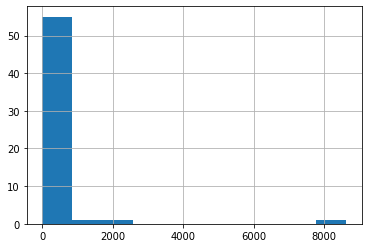

In [0]:
us_subset_df.groupby("Province_State")["Deaths"].sum().hist()

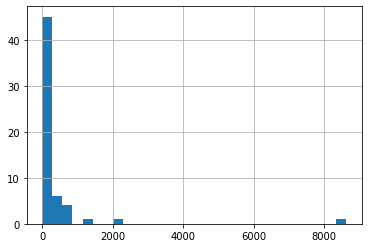

In [0]:
us_subset_df.groupby("Province_State")["Deaths"].sum().hist(bins=30)

How do confirmed cases compare to deaths?

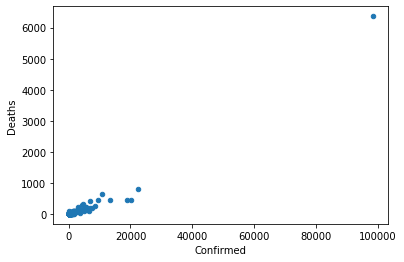

In [0]:
us_subset_df.plot.scatter(x="Confirmed", y="Deaths")

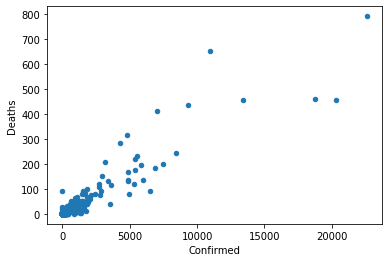

In [0]:
us_subset_df[us_subset_df["Deaths"] < 1000].plot.scatter(x="Confirmed", y="Deaths")

Import the data for all available days

In [0]:
src_path_base = "dbfs:/databricks-datasets/COVID/CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports/"
dest_path_base = "file:////tmp/covid_daily_reports/"

files = [
 '11-21-2020.csv',
 '11-22-2020.csv',
 '11-23-2020.csv',
 '11-24-2020.csv',
 '11-25-2020.csv',
 '11-26-2020.csv',
 '11-27-2020.csv',
 '11-28-2020.csv',
 '11-29-2020.csv',
 '11-30-2020.csv'
]

dfs = []

for file in files:
  filename = dest_path_base+file
  dbutils.fs.cp(src_path_base+file, filename)
  
  temp_df = pd.read_csv(filename)
  temp_df.columns = [c.replace("/", "_") for c in temp_df.columns]
  temp_df.columns = [c.replace(" ", "_") for c in temp_df.columns]
  
  month, day, year = filename.split("/")[-1].replace(".csv", "").split("-")
  d = datetime.date(int(year), int(month), int(day))
  temp_df["Date"] = d

  dfs.append(temp_df)
  
all_days_df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
all_days_df = all_days_df.drop(["Lat", "Long_", "FIPS", "Combined_Key", "Last_Update"], axis=1)

In [0]:
all_days_df.head()

,Admin2,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,Date
0,NaN,NaN,Afghanistan,44503,1675,35422,7406.0,114.320310,3.763791,2020-11-21
1,NaN,NaN,Albania,32196,685,15469,16042.0,1118.771284,2.127593,2020-11-21
2,NaN,NaN,Algeria,73774,2255,48183,23336.0,168.237732,3.056632,2020-11-21
3,NaN,NaN,Andorra,6207,76,5290,841.0,8033.391574,1.224424,2020-11-21
4,NaN,NaN,Angola,14413,336,7273,6804.0,43.853473,2.331229,2020-11-21


How has the disease spread over time?

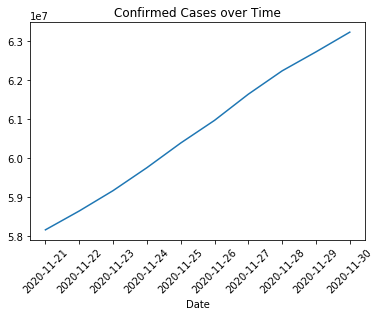

In [0]:
all_days_df.groupby("Date")["Confirmed"].sum().plot(title="Confirmed Cases over Time", rot=45)

Break this down by types of cases

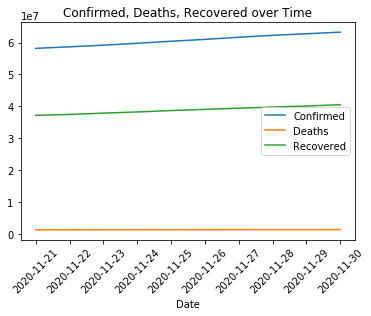

In [0]:
all_days_df.groupby("Date")["Confirmed", "Deaths", "Recovered"].sum().plot(title="Confirmed, Deaths, Recovered over Time", rot=45)

What is the growth in my county?

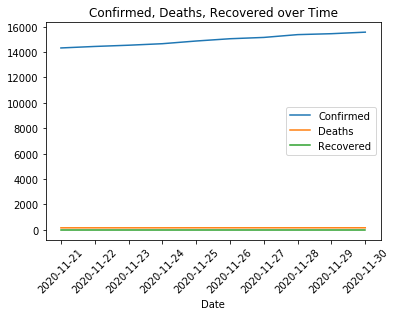

In [0]:
(all_days_df[(all_days_df["Country_Region"] == "US") & (all_days_df["Province_State"] == "California") & (all_days_df["Admin2"] == "San Francisco")]
  .groupby("Date")["Confirmed", "Deaths", "Recovered"]
  .sum()
  .plot(title="Confirmed, Deaths, Recovered over Time", rot=45))

Wrap this up in a function and run it yourself!

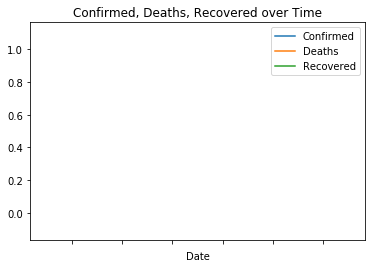

In [0]:
def plotMyCountry(Country_Region, Province_State, Admin2):
  (all_days_df[(all_days_df["Country_Region"] == Country_Region) & (all_days_df["Province_State"] == Province_State) & (all_days_df["Admin2"] == Admin2)]
    .groupby("Date")["Confirmed", "Deaths", "Recovered"]
    .sum()
    .plot(title="Confirmed, Deaths, Recovered over Time", rot=45))
  
plotMyCountry("US", "New York", "New York City")